
### 1

Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad (Links to an external site.)Links to an external site.

 

1.1
Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

1.2 Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
dt=pd.read_csv("hitters.csv")

In [3]:
dt.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [4]:
#remove categorical variable
dt=dt[np.isfinite(dt['Salary'])]
# remove the category variable
X = dt.drop(["Unnamed: 0","Salary","League","Division","NewLeague"],axis=1)
# target
y=dt["Salary"]

### simple regressioin

In [5]:
#build the model with sm.model
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     62.87
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           1.90e-77
Time:                        22:37:33   Log-Likelihood:                -1882.6
No. Observations:                 263   AIC:                             3797.
Df Residuals:                     247   BIC:                             3854.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AtBat         -1.8264      0.586     -3.114      0.0

### Ridge and Lasso Regression

In [6]:
from sklearn import linear_model
#alphas: a series of values
alphas = 10**np.linspace(10,-2,100)*0.5



In [7]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


### 1.1 Lasso

The 3 features left are PutOuts, RBI, CRBI if we set the alpha to be a large value.  
The optimal alpha value is 2.24 and 6 features left for the optimal model.

optimal alpha is 2.24102067695


AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.516704
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.000000
CRBI       0.208457
CWalks     0.000000
PutOuts    0.021337
Assists    0.000000
Errors     0.000000
dtype: float64

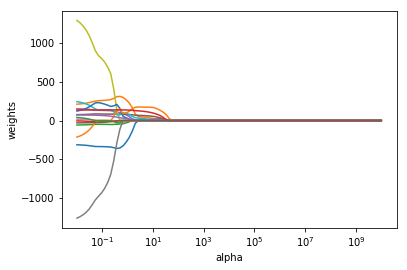

In [8]:
import random
random.seed(9001)
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print("optimal alpha is "+str(lassocv.alpha_))
#lasso.set_params to select the 3 features left
lasso.set_params(alpha=17)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

### 1.2 ridge   
the optimal value of alpha is 0.57

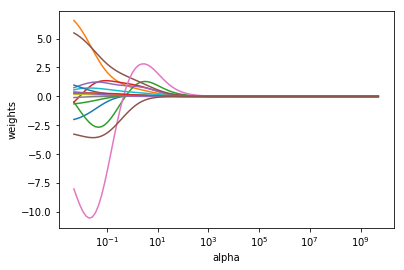

In [9]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [10]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))
ridge4.fit(X, y)
print(pd.Series(ridge4.coef_, index = X.columns))

print("the optimal value of alpha is "+str(ridgecv.alpha_))

AtBat      0.046181
Hits       0.945478
HmRun      0.093945
Runs       1.128396
RBI        0.928647
Walks      1.769113
Years      0.774010
CAtBat     0.011170
CHits      0.061145
CHmRun     0.417670
CRuns      0.123833
CRBI       0.128025
CWalks     0.047186
PutOuts    0.183886
Assists    0.038948
Errors    -1.512571
dtype: float64
the optimal value of alpha is 0.574878497699


### 2
Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance. 

1.Bias is the difference between values from the model and the correct value. Variance is the generality of the model for new dataset. Model with high variance can fit the training data very well but fail at the generality of testing data. For a machine learning model, the error MSE can be decomposed to variance and bias. When underfitting, the variance is low but bias is high. When overfitting, the bias is low but the variance is high. This is called tradefoff. 

2.Regularization is used to reduce the high variance so that we can control overfitting. In the models above, when using regulariztion on the linear model, it pushes all the parameters to close or equal to zeros. It can reduce the overfitting, thus having a lower variance but could be at the cost of relatively higher bias.